# Load and examine a dataset
- sample by HW, mesurment by CO
- high-pressure torsion sample, Ni65Cu35

# Set environment: Load the packages
- for details on how to connect to the cluster and set up environments visit paullobpreis.com (pw:4DSTEM)

In [1]:
import scipy as sp
import numpy as np
import matplotlib
import matplotlib as plt

# timestr used to create simple timestamps for easier version controll
import time
timestr = time.strftime("%Y%m%d")

# py4dstem as main tool, the follwing command also prints the currently used version
import py4DSTEM
py4DSTEM.__version__

'0.14.15'

In [2]:
# make dir for output images
import os
output_dir = 'output_images_' + timestr

os.makedirs(output_dir)


In [3]:
# Load the .dm4 file from a workspace on OMNI or XNAS, set filepath with 'filepath_data = "FILEPATH"'
# even better, use dirpath'' and 'filepath_data', this makes it easier to add more paths later

dirpath = "/fast/ws-tmp/g031362-data/high_pressure_torsion/lamC/ROI3/" #OMNI

filepath_data = dirpath + 'COPL_Ni65Cu35_C_ROI3_240827_aper_50_conv_1.5_spot_6_CL_47_stepsize_10_r_x_178_r_y_186_GIF_512x512_preprocessed_unfiltered_no_bin.h5'

In [4]:
# Examine the file contents

py4DSTEM.print_h5_tree( filepath_data )

/
|---dm_dataset_root
    |---dm_dataset




In [5]:
# Load data into RAM

datacube = py4DSTEM.read(
    filepath = filepath_data,
    datapath = 'dm_dataset_root/dm_dataset'
)

In [6]:
datacube

DataCube( A 4-dimensional array of shape (186, 178, 512, 512) called 'dm_dataset',
          with dimensions:

              Rx = [0,5,10,...] nm
              Ry = [0,5,10,...] nm
              Qx = [0.0,0.0072991721332073215,0.014598344266414643,...] A^-1
              Qy = [0.0,0.0072991721332073215,0.014598344266414643,...] A^-1
)

# Basic visualization

In [7]:
# to make the syntax easier we import the funktion 'show' this allows us to write 'show(dp)' insted of 'py4DSTEM.show(dp)'
from py4DSTEM import show

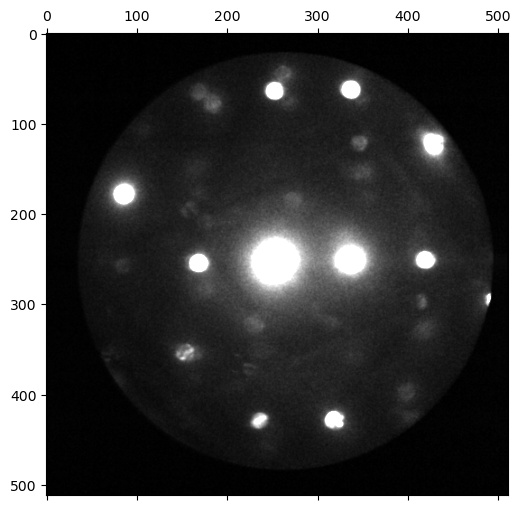

In [8]:
# Let’s examine a single diffraction pattern.
# We can achieve this by 'slicing' into the datacube, using two integer indices that represent the beam position (rx, ry) of interest

dp = datacube.data[50,60]

fig, ax = show(
    dp,
    figsize=(6,6),
    returnfig = True)


fig.savefig(os.path.join(output_dir, 'dp.pdf'))

# Image scaling and contrast
- py4DSTEM attempts to automatically adjust image contrast to highlight numerous image features. 
- manual adjustments to scaling and contrast are often needed to reveal more image details. This can be achieved by applying a nonlinear intensity-to-color mapping, adjusting the color axis range, or both
- make these modifications by adding extra arguments to the show() function

To adjust the image contrast in py4DSTEM, you can specify the color axis range, apply logarithmic scaling, or use power law scaling. Here's how you can do it:

- Manual Range: Set a specific intensity range.
- Logarithmic Scaling: Ideal for varying intensity by orders of magnitude.
- Power Law Scaling: Useful for fine-tuning visualization, such as excluding extremely weak features.

You can also choose different colormaps to visualize pixel intensities effectively.

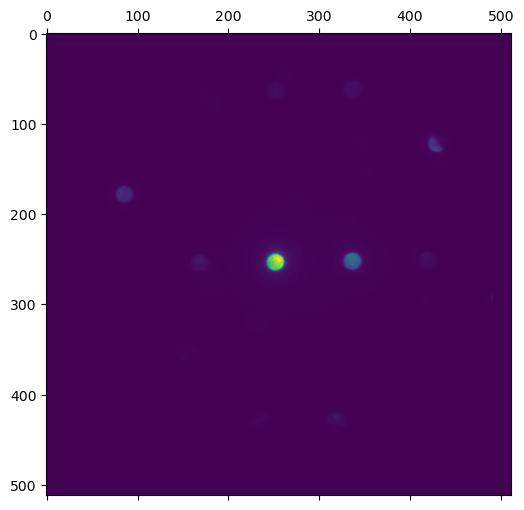

In [9]:
# intensity_range: Defines how to scale intensity ('ordered', 'absolute', 'log').
# vmin and vmax: Specify the intensity range.
# cmap: Choose the colormap for pixel intensity visualization.
# Matplotlib offers a wide range of colormaps

fig, ax = show(
    dp,
    intensity_range='ordered', # try 'absolute' or 'log'
    vmin=0,
    vmax=1,
    cmap='viridis', # try 'turbo' or ',
    figsize=(6,6),
    aspect='auto',
    returnfig = True)


fig.savefig(os.path.join(output_dir, 'dp_ordered_cmap_viridis.pdf'))

# Mean and Maximum Diffraction Patterns
- To quickly evaluate the dataset—whether it’s single crystal, polycrystalline, amorphous, or a mixture—we can calculate the mean diffraction pattern.
- This approach provides an overview of the entire dataset by averaging all the diffraction patterns, helping to identify the general characteristics of the sample efficiently.

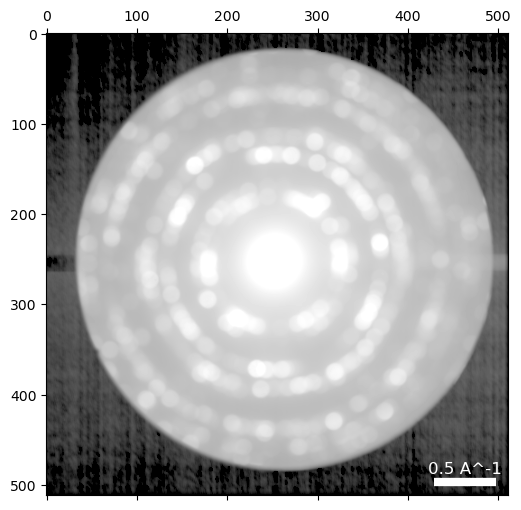

In [10]:
# Mean diffraction pattern

# compute
dp_mean = datacube.get_dp_mean()

# show
fig, ax = show(
    dp_mean,
    scaling='log',
    figsize=(6,6),
    aspect='auto',
    returnfig = True
)

fig.savefig(os.path.join(output_dir, 'dp_mean.pdf'))

In [11]:
# The mean diffraction pattern is stored as a native py4DSTEM datatype, 
# called 'VirtualDiffraction' class, which is basically a numpy array

dp_mean
dp_mean.data

array([[ -8.762402  , -10.808594  , -10.120724  , ...,  -0.4800233 ,
         -0.44855037,   0.08299597],
       [ -8.566234  , -11.625824  ,  -9.81323   , ...,  -1.9225271 ,
         -1.9235978 ,   0.11064233],
       [ -7.3081174 , -10.621657  ,  -8.914765  , ...,  -1.9285914 ,
         -1.7261181 ,  -0.08480806],
       ...,
       [ -0.07171129,  -1.0990025 ,  -1.204221  , ...,   1.5885267 ,
         -2.274352  ,  -0.26072952],
       [  1.0353491 ,  -0.3753379 ,  -0.29826772, ...,   1.8749375 ,
         -1.2761693 ,  -0.17865184],
       [  0.680243  ,  -0.13625632,   0.24624477, ...,   0.7966865 ,
         -0.6324635 ,  -0.25812995]], dtype=float32)

In [12]:
# the output will be automatically stored in a filetree-like structure for data storage

datacube.tree()

/
|---dp_mean


(<Figure size 600x600 with 1 Axes>, <Axes: >)

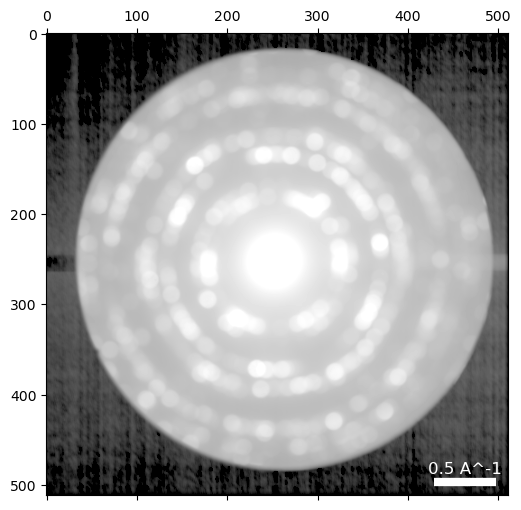

In [13]:
# thereby the mean diffraction pattern can be always accesed by:

datacube.tree( 'dp_mean' )

# and shown via:

show(
    datacube.tree( 'dp_mean' ),
    scaling='log',
    figsize=(6,6),
    aspect='auto',
    returnfig = True
)


While calculating the mean diffraction pattern provides an overview of prominent features, such as intensity rings and Bragg disks, it can hide features that appear only in a few scan positions.

To address this, we also visualize the maximum diffraction pattern, which captures the maximum signal of each pixel across all probe positions. This approach reveals the brightest scattering from each pixel, highlighting all Bragg scattering even if it occurs in just one diffraction image

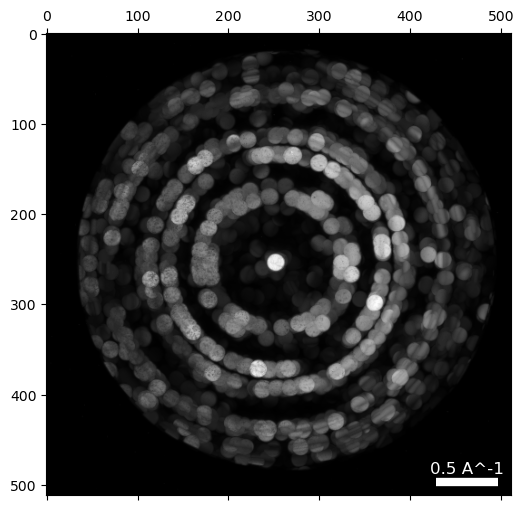

In [14]:
# Maximum diffraction pattern

# compute
dp_max = datacube.get_dp_max()

# show
fig, ax = show(
    dp_max,
    vmin=0,
    vmax=1e7,
    figsize=(6,6),
    aspect='auto',
    returnfig = True  
)

fig.savefig(os.path.join(output_dir, 'dp_max.pdf'))

# Virtual imaging
- now we will generate virtual bright field (BF) and virtual dark field (DF) images

## Virtual Bright field (BF)

In [15]:
### Set detector geometry by hand

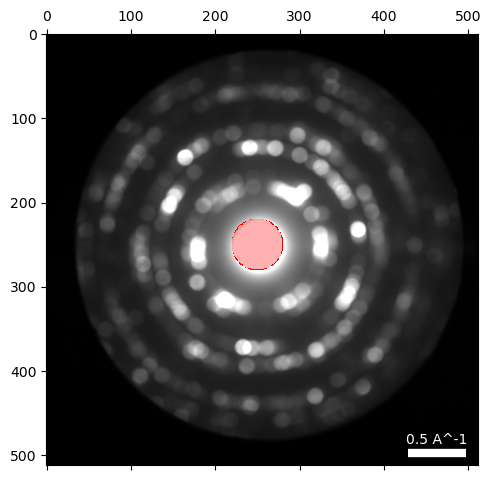

In [16]:
# First we need to position the detector
# we can set the geometry by hand

center = (250,250)

radius = 30


# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'circle',
    geometry = (
        center,
        radius
    )
)

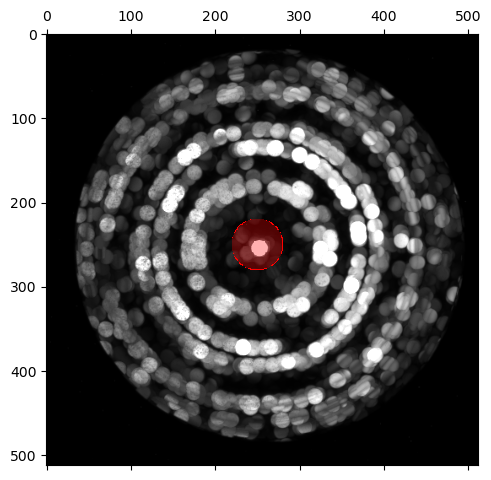

In [17]:
# By default, the position_detector method overlays the selected detector on the mean diffraction pattern if it's available
# You can also overlay it on other images, such as the maximum diffraction pattern or a specific scan position

datacube.position_detector(
     data = dp_max,
#     data = datacube[10,30],
    mode = 'circle',
    geometry = (
        center,
        radius
    ),
)

### Set detector geometry programmatically

Instead of determining the center and radius by hand, we can do so programmatically by determining the position and radius of the center beam.

Estimated probe radius = 9.34 pixels


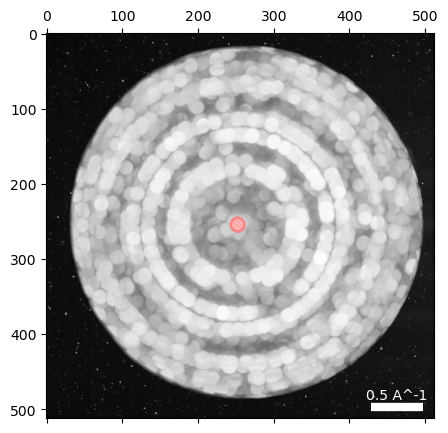

In [18]:
# Find the center and probe radius


# Get the probe position and size
probe_semiangle, probe_qx0, probe_qy0 = datacube.get_probe_size(
    dp_mean.data,
)

# Overlay the computed probe over the maximum diffraction pattern
fig, ax = show(
    dp_max, 
    scaling='log',
    vmin = 0,
    vmax = 1e5,
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle,
      'alpha':0.3,
      'fill':True
    },
    aspect='auto',
    returnfig = True 
)

# Print the estimated probe radius
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

# save fig
fig.savefig(os.path.join(output_dir, 'BF_set_det_prog_dp_max.pdf'))

100%|███████████████████████████████████████████████████████████| 33108/33108 [00:05<00:00, 6076.13it/s]


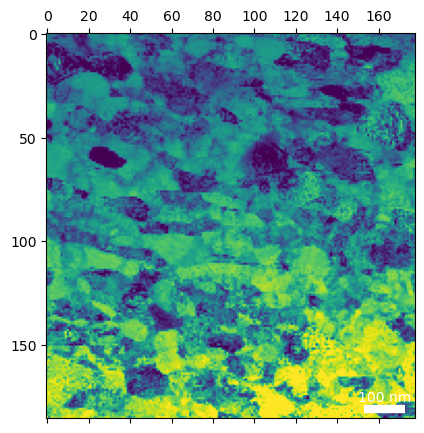

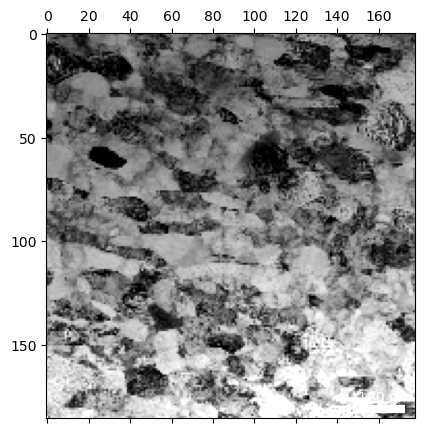

In [19]:
# Capture/compute the virtual BF 

datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',       # the output will be stored in `datacube`'s tree with this name
)

# and show the result
fig, ax = show( datacube.tree('bright_field'),
    returnfig = True,
        cmap='viridis'
              )

# and show the result
fig, ax = show( datacube.tree('bright_field'),
    returnfig = True
              )

# save fig
fig.savefig(os.path.join(output_dir, 'BF.pdf'), bbox_inches='tight')

## Annular dark-field imaging (ADF)

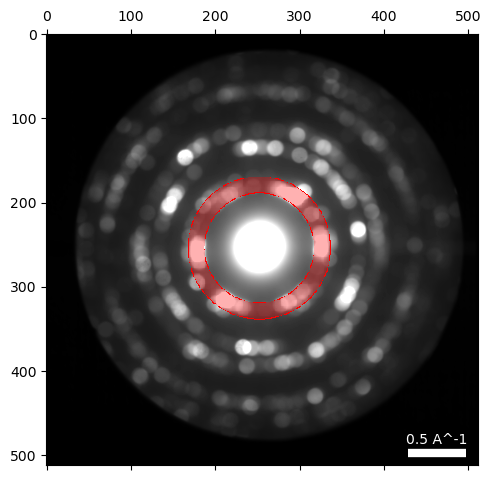

In [20]:
# Position the detector


# set the geometry
center = probe_qx0, probe_qy0
r_inner = probe_semiangle * 7
r_outer = probe_semiangle * 9
radii = r_inner,r_outer

# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'annular',
    geometry = (
        center,
        radii
    )
)

100%|███████████████████████████████████████████████████████████| 33108/33108 [00:05<00:00, 6148.52it/s]


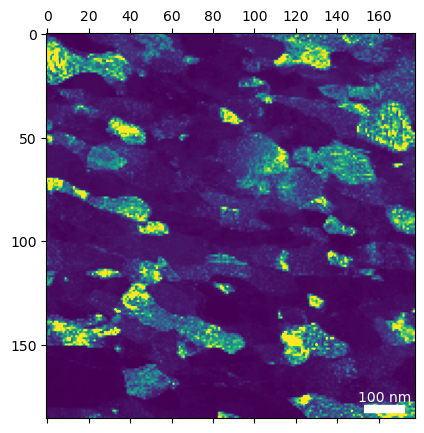

In [21]:
# Capture the virtual ADF

# compute
datacube.get_virtual_image(
    mode = 'annulus',
    geometry = (center,radii),
    name = 'annular_dark_field'
)

# show
fig, ax = show(datacube.tree('annular_dark_field'),
        returnfig = True,
        cmap='viridis'
              )

# save fig
fig.savefig(os.path.join(output_dir, 'ADF.pdf'), bbox_inches='tight')

# Off axis dark-field imaging
In traditional TEM dark-field imaging, a parallel beam illuminates the sample, and an aperture in the diffraction plane isolates electrons scattered through a specific area, producing an image from those electrons.

Similarly, we can create a virtual off-axis dark-field image by positioning a circular detector in an off-axis location in diffraction space.

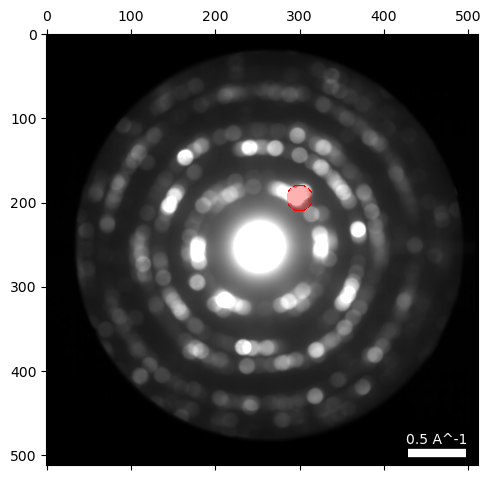

In [22]:
# Position detector

qx0_DF,qy0_DF = 195,300


r_DF = 15

geometry = (
    (qx0_DF,qy0_DF),
    r_DF
)

datacube.position_detector(
    mode = 'circular',
    geometry = geometry
)

100%|███████████████████████████████████████████████████████████| 33108/33108 [00:05<00:00, 6011.15it/s]


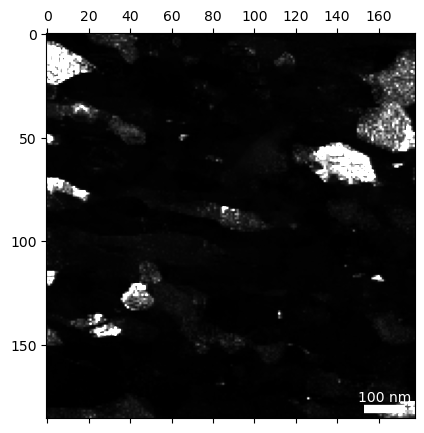

In [23]:
# Capture and display the off-axis DF image

datacube.get_virtual_image(
    mode = 'circle',
    geometry = geometry,
    name = 'virt_dark_field_01'
)

fig, ax = show(datacube.tree('virt_dark_field_01'),
              returnfig = True)

# save fig 
fig.savefig(os.path.join(output_dir, 'off_axis_DF.pdf'), bbox_inches='tight')

# Virtual Diffraction
We can also create an average diffraction pattern from a subset of scan positions, revealing the scattering characteristics in specific areas of real space.

Previously, we generated virtual diffraction patterns, such as the mean and maximum, using all data points. Now, we'll compute similar patterns, but only from selected scan positions.

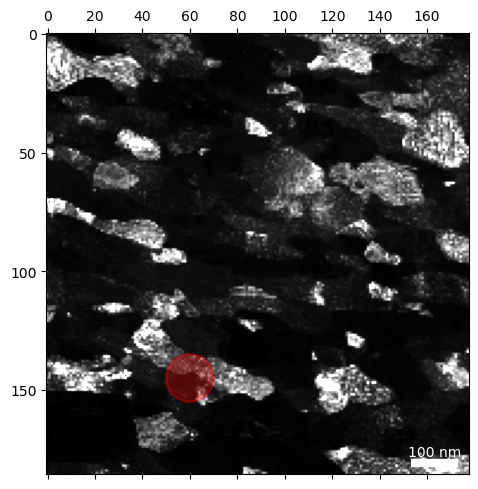

In [24]:
# Select a region of real space with a circular mask.


# set geometry
mask_x0, mask_y0 = 145,60
mask_radius = 10


# plot the mask geometry, overlaid onto the dark field image we created earlier
show(
    datacube.tree('annular_dark_field'),
    circle = {
      'center':(mask_x0, mask_y0),
      'R': mask_radius,
      'alpha':0.3,
      'fill':True
    }
)

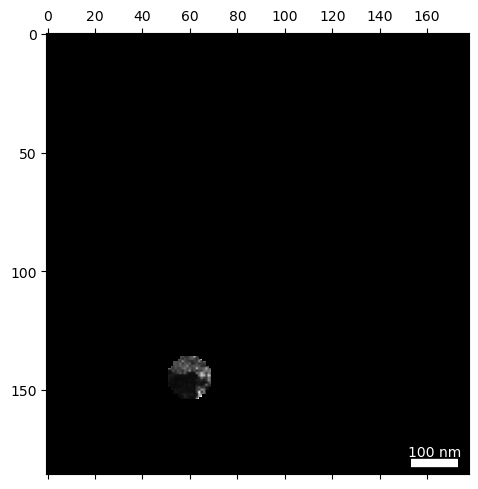

In [25]:
# The virtual diffraction method expects a real-space shaped boolean mask - that is, an array with
# values of True and False - to tell it which scan positions to use to make the virtual image.

# The code below makes a mask

import numpy as np
ryy,rxx = np.meshgrid(
    np.arange(datacube.R_Ny),
    np.arange(datacube.R_Nx),
)
rrr = np.hypot( rxx-mask_x0, ryy-mask_y0 )
mask = rrr < mask_radius

# show
show(
    datacube.tree('annular_dark_field'),
    mask = mask
)

# selected area diffraction 2

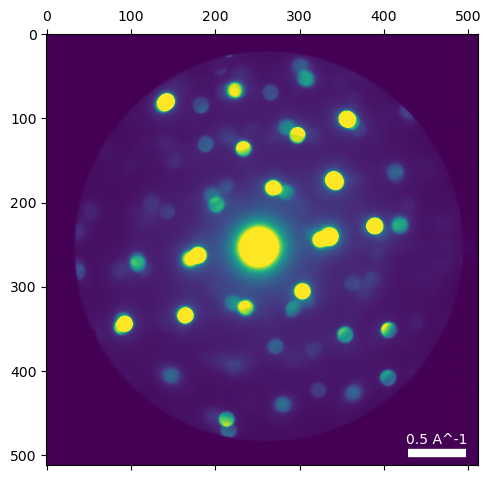

In [26]:
# Find the mean of the diffraction pattern in the specified region

selected_area_diffraction_01 = datacube.get_virtual_diffraction(
    method = 'mean',
    mask = mask,
    name = 'selected_area_diffraction_01'
)

# show
py4DSTEM.visualize.show(
    selected_area_diffraction_01,
    cmap = 'viridis'
)

# Write and read

In [27]:
# set a filepath

dirpath

filepath_save = dirpath + 'analysis_basics_01.h5'
filepath_save

'/fast/ws-tmp/g031362-data/high_pressure_torsion/lamC/ROI3/analysis_basics_01.h5'

In [28]:
# inspect what's in `datacube`'s  tree - this is what we'll save!

datacube.tree()

/
|---dp_mean
|---dp_max
|---bright_field
|---annular_dark_field
|---virt_dark_field_01
|---selected_area_diffraction_01


In [29]:
# save

py4DSTEM.save(
    filepath_save,
    datacube,
    tree = None,  # this indicates saving everything *under* datacube, but not not datacube itself
    mode = 'o'    # this says that if a file of this name already exists, we'll overwrite it
)

In [30]:
# inspect the resulting HDF5 file

py4DSTEM.print_h5_tree(filepath_save)

/
|---dm_dataset_root
    |---annular_dark_field
    |---bright_field
    |---dp_max
    |---dp_mean
    |---selected_area_diffraction_01
    |---virt_dark_field_01




In [31]:
# check that it worked as expected - load everything:

d = py4DSTEM.read(filepath_save)

In [32]:
d.tree()

/
|---annular_dark_field
|---bright_field
|---dp_max
|---dp_mean
|---selected_area_diffraction_01
|---virt_dark_field_01


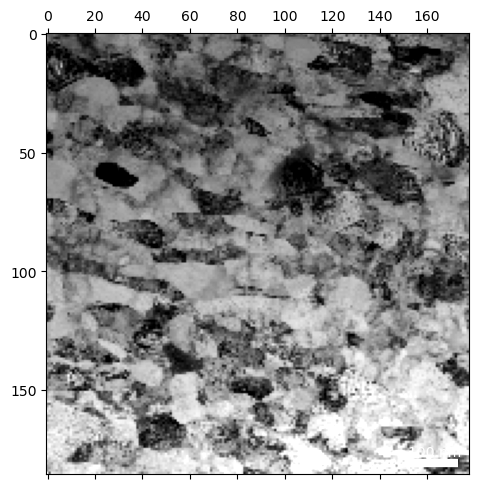

In [33]:
show(d.tree('bright_field'))